In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [4]:
total_test

51

In [5]:
# 3
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

train_image_generator = ImageDataGenerator(rescale=1./255,)
validation_image_generator = ImageDataGenerator(rescale=1./255,)
test_image_generator = ImageDataGenerator(rescale=1./255,)

train_data_gen = train_image_generator.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(IMG_HEIGHT, IMG_WIDTH),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(
        validation_dir,  # this is the target directory
        target_size=(IMG_HEIGHT, IMG_WIDTH),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')

test_data_gen = test_image_generator.flow_from_directory(
        PATH,  # this is the target directory
        shuffle=False,
        target_size=(IMG_HEIGHT, IMG_WIDTH),  # all images will be resized to 150x150
        batch_size=batch_size,
        classes=['test'], # needed
        class_mode='binary',
        
        )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


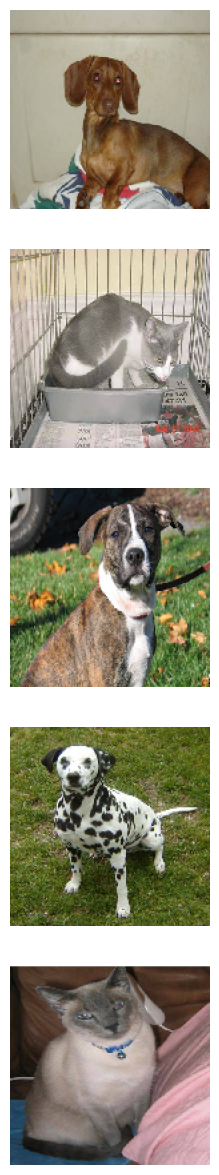

In [6]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [7]:
# 5
train_image_generator = ImageDataGenerator(
        rescale=1./255, 
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


Found 2000 images belonging to 2 classes.


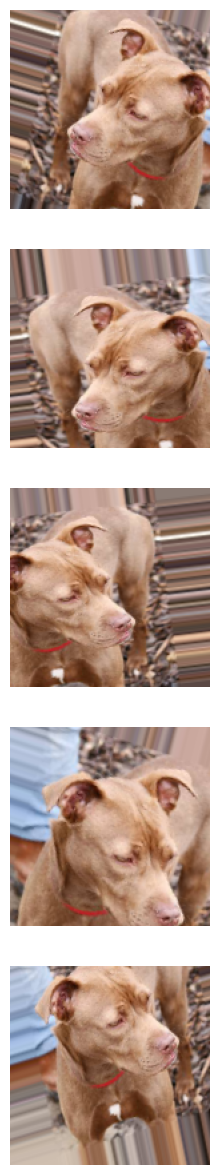

In [8]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [9]:
# 7
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(IMG_HEIGHT, IMG_WIDTH,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))





model.summary()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [10]:
# 8
from keras import callbacks


history = model.fit(
        train_data_gen,
        steps_per_epoch=2000 // batch_size,
        epochs=epochs,
        validation_data=val_data_gen,
        validation_steps=1000 // batch_size,
        )


Epoch 1/15
15/15 [==============================] - 39s 2s/step - loss: 0.7044 - accuracy: 0.5043 - val_loss: 0.6920 - val_accuracy: 0.5011
Epoch 2/15
15/15 [==============================] - 21s 1s/step - loss: 0.6924 - accuracy: 0.5118 - val_loss: 0.6897 - val_accuracy: 0.6283
Epoch 3/15
15/15 [==============================] - 19s 1s/step - loss: 0.6922 - accuracy: 0.5155 - val_loss: 0.6856 - val_accuracy: 0.5982
Epoch 4/15
15/15 [==============================] - 21s 1s/step - loss: 0.6911 - accuracy: 0.5037 - val_loss: 0.6858 - val_accuracy: 0.5190
Epoch 5/15
15/15 [==============================] - 19s 1s/step - loss: 0.6875 - accuracy: 0.5518 - val_loss: 0.6775 - val_accuracy: 0.5301
Epoch 6/15
15/15 [==============================] - 19s 1s/step - loss: 0.6733 - accuracy: 0.5726 - val_loss: 0.6374 - val_accuracy: 0.6440
Epoch 7/15
15/15 [==============================] - 20s 1s/step - loss: 0.6545 - accuracy: 0.6079 - val_loss: 0.6206 - val_accuracy: 0.6339
Epoch 8/15
15/15 [==

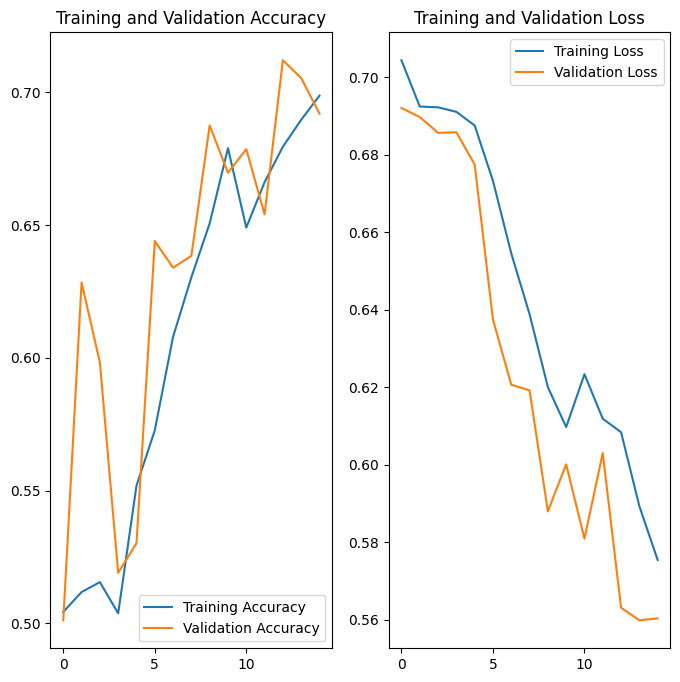

In [11]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [15]:
predictions = model.predict(test_data_gen)
predictions

1/1 [==============================] - 0s 273ms/step


array([[0.68115574],
       [0.27154934],
       [0.14469494],
       [0.8893314 ],
       [0.6397534 ],
       [0.60505545],
       [0.7462772 ],
       [0.24203864],
       [0.6576927 ],
       [0.9556851 ],
       [0.67062205],
       [0.70385695],
       [0.4026405 ],
       [0.16544034],
       [0.6284155 ],
       [0.8456155 ],
       [0.7744917 ],
       [0.9362402 ],
       [0.7323137 ],
       [0.76233494],
       [0.11427478],
       [0.6750367 ],
       [0.38406914],
       [0.55864507],
       [0.6387985 ],
       [0.47493017],
       [0.9725108 ],
       [0.4239306 ],
       [0.48464903],
       [0.5678204 ],
       [0.38960534],
       [0.31983915],
       [0.88288736],
       [0.9997181 ],
       [0.5667089 ],
       [0.749795  ],
       [0.99089444],
       [0.8203821 ],
       [0.4161689 ],
       [0.37781975],
       [0.45880815],
       [0.5944198 ],
       [0.94542557],
       [0.74292415],
       [0.3174099 ],
       [0.4830418 ],
       [0.4840413 ],
       [0.360

In [19]:
probabilities =  [p[0] for p in predictions]
probabilities

[0.68115574,
 0.27154934,
 0.14469494,
 0.8893314,
 0.6397534,
 0.60505545,
 0.7462772,
 0.24203864,
 0.6576927,
 0.9556851,
 0.67062205,
 0.70385695,
 0.4026405,
 0.16544034,
 0.6284155,
 0.8456155,
 0.7744917,
 0.9362402,
 0.7323137,
 0.76233494,
 0.11427478,
 0.6750367,
 0.38406914,
 0.55864507,
 0.6387985,
 0.47493017,
 0.9725108,
 0.4239306,
 0.48464903,
 0.5678204,
 0.38960534,
 0.31983915,
 0.88288736,
 0.9997181,
 0.5667089,
 0.749795,
 0.99089444,
 0.8203821,
 0.4161689,
 0.37781975,
 0.45880815,
 0.5944198,
 0.94542557,
 0.74292415,
 0.3174099,
 0.4830418,
 0.4840413,
 0.36018434,
 0.36990586,
 0.39978138]

In [20]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 70.0% of the images of cats and dogs.
You passed the challenge!
